# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [6]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

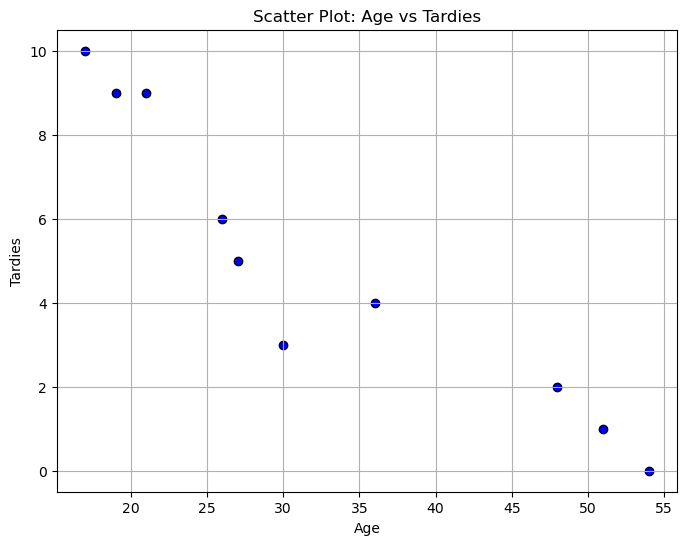

In [9]:
# Draws a dispersion diagram (scatterplot) for the data above.

# Creates a scatter plot for the Pandas Dataframe created in the previous step.
# The dataframe is called student_data, and consists of two columns.
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', edgecolor='black')

# Adds labels and title to the scatter plot
plt.title('Scatter Plot: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

# Shows the scatter plot
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

It seems as though the hypotheses stated by the author may be correct. The scatterplot shows that the older a person is, the fewer tardies the individual has.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [115]:
# Calculates the Covariance and the Correlation for the student_data dataframe.
import pandas as pd

# Data to evaluate
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Calculate and print covariance and correlation
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(f"Covariance: {covariance:.4f}")
print(f"Correlation: {correlation:.4f}")

# Covariance measures how Age and Tardies change together, 
# but its value depends on the variables' scales. 
# Correlation standardizes this, showing the strength and direction 
# of the relationship between -1 (strong negative) and 1 (strong positive).
# Here, the strong negative correlation (-0.94) suggests older students 
# tend to have fewer tardies.

Covariance: -45.5667
Correlation: -0.9392


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [80]:
# Builds a regression model for the student_data dataframe. 
import pandas as pd
import statsmodels.api as sm

# Given data
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Defines the outcome (dependent) and predictor (independent) variables
X = student_data['Age']  # Predictor variable
y = student_data['Tardies']  # Outcome variable

# Adds a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# Builds the regression model (OLS - ordinary least squares)
results = sm.OLS(y, X).fit()  

# Prints the regression results
print(results.summary())

# The predictor/independent variable is Age and the outcome/dependent is Tardies.
# A simple linear regression using ordinary least squares (OLS) was used, minimizing
# the sum of squared residuals. An intercept term was added so that the regression could have a non-zero 
# intercept. sm.OLS(y,X) and model.fit() were used to specify the model and fit the regression line to the data, respectively.
# Lastly, a detailed summary of the regression was generated. 

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.57e-05
Time:                        15:57:55   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Plot your regression model on your scatter plot.

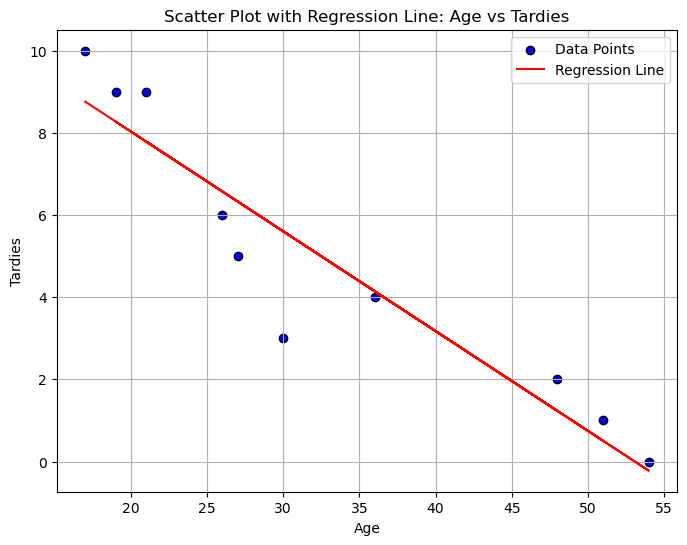

In [117]:
# Plots the regression model on the scatter plot.
# As indicated previously, Age is the predictor/independent variable and Tardies is the outcome/dependent variable.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Given data
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Defines the outcome (dependent) and predictor (independent) variables
X = student_data['Age']  # Predictor variable
y = student_data['Tardies']  # Outcome variable

# Adds a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# Builds the regression model (simple linear regression model with OLS, ordinary least squares.
model = sm.OLS(y, X)  
results = model.fit()

# Predicts the values of Tardies based on the regression model
predicted_tardies = results.predict(X)

# Plotts the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', edgecolor='black', label='Data Points')

# Plots the regression line
plt.plot(student_data['Age'], predicted_tardies, color='red', label='Regression Line')

# Adds labels and title
plt.title('Scatter Plot with Regression Line: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

# Shows the legend
plt.legend()

# Shows the plot
plt.grid(True)
plt.show()

# Age appears to be a significant predictor of Tardies. In other words, there is a strong relationship
# between how old a student is and the number of tardies they have (r-squared = 0.88). There could be other factors
# influencing tardiness, but age appears to be the largest one, and the one that explains most of the variability. Also,
# the p-value is very small, and thus we are able to say we have sufficient evidence to reject the null hypothesis 
# (*age has no effect on Tardies*).

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**Age** appears to be a significant predictor of **Tardies**. In other words, there is a strong relationship
between how old a student is and the number of tardies they have (r-squared = 0.88). There could be other factors
influencing tardiness, but age appears to be the largest one, and the one that explains most of the variability. Also,
the p-value is very small, and thus we are able to say we have sufficient evidence to reject the null hypothesis (*age has no effect on Tardies*).

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. This dataset includes the following variables: model, make, and energy efficiency standards, as well as each car's CO2 emissions. The goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [122]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("/Users/sylviaperez-montero/Desktop/lab-regression-analysis-en-main/vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [125]:
# Reads the vehicles.csv file and calculates the correlations between each of the variables. 
import pandas as pd
import numpy as np

# Load the data into a pandas DataFrame
data = pd.read_csv("/Users/sylviaperez-montero/Desktop/lab-regression-analysis-en-main/vehicles.csv")  

# Select the relevant columns
columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df = data[columns]

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Print the correlations of each independent variable with the outcome variable
print("\nCorrelations with CO2 Emission Grams/Mile:")
print(correlation_matrix['CO2 Emission Grams/Mile'])

# Based on the correlations, Fuel Barrels/Year appears to be the most important variable in determining CO2 emissions as it has
# the highest absolute value correlation with CO2 Emission Grams/Mile. Year appears to be providing the least amount of helpful
# information with respect to CO2 emissions. The number of cylinders appears to be lead to higher fuel consumption and CO2 emissions.
# Combined MPG appears to have a strong negative correlation with CO2 emission, as its correlation coefficient is -0.93.
# Fuel cost/Yr is also strongly correlated though not as much as fuel barrels per year; this may be because there are many external
# factors that play into fuel prices.


                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [128]:
# Reads the vehicles.csv file and creates a regression model for the variables.
# An Ordinary Leasts Squares model is used, and the model is fit using model.fit().
import pandas as pd
import statsmodels.api as sm

# Loads the data into a pandas DataFrame
data = pd.read_csv("/Users/sylviaperez-montero/Desktop/lab-regression-analysis-en-main/vehicles.csv") 

# Selects the relevant columns
columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df = data[columns]

# Defines the independent and dependent variables
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

# Adds a constant to the independent variables
X = sm.add_constant(X)

# Fits the multiple linear regression model
model = sm.OLS(y, X).fit()

# Prints the model summary
print(model.summary())

# Gets the coefficients
coefficients = model.params

print("\nCoefficients:")
print(coefficients)

# Gets the p-values
p_values = model.pvalues


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             16:11:36   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [131]:
# Displays the results
print("\nP-values:")
print(p_values)

# Upon reviewing the results of the OLS regression model generated, it becomes apparent that 
# all variables have a statistically significant relationship with CO2 emissions (much lower than a p-value of 0.05).
# Important to keep in mind that correlation does not equal causation, reason for which further analysis would be warranted
# to understand the direction and magnitude of the relationships between these variables and CO2 Emmission.


P-values:
const                 0.000000e+00
Year                 3.908997e-236
Cylinders            2.755333e-112
Fuel Barrels/Year     0.000000e+00
Combined MPG          0.000000e+00
Fuel Cost/Year        0.000000e+00
dtype: float64


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [136]:
# Builds a dataframe for the data provided.

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data 
X = np.array([1, 3, 4, 6, 8, 9, 11, 14])  # Number of people invited
Y = np.array([0, 1, 0, 2, 3, 2, 3, 1])  # Number of people that did not attend

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(X, Y)

# Print the results
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation Coefficient: 0.550
P-value: 0.157


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

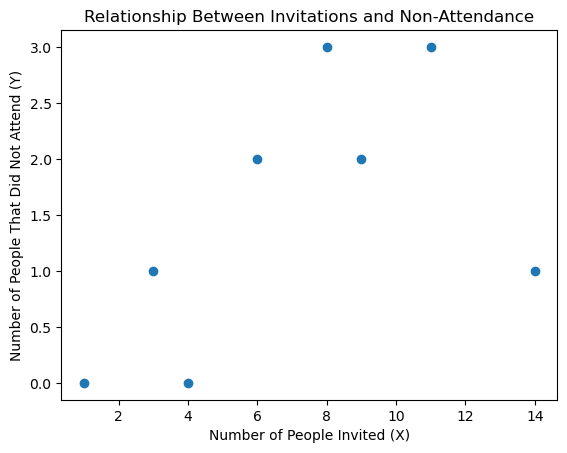

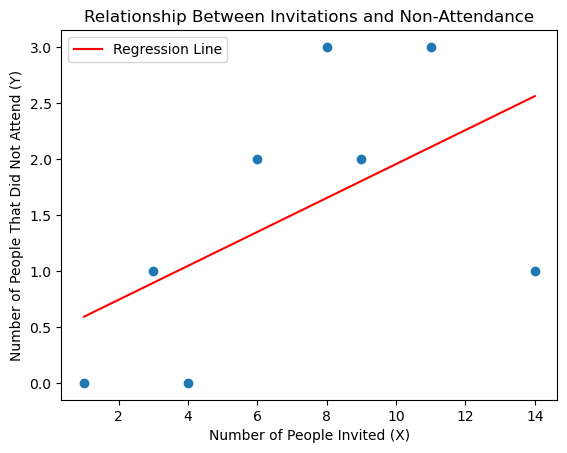

In [139]:
# Draws a dispersion diagram (scatter plot) for the data, and fits a regression line.

# Creates a scatter plot
plt.scatter(X, Y)
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People That Did Not Attend (Y)")
plt.title("Relationship Between Invitations and Non-Attendance")
plt.show()

# Calculates the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
line = slope * X + intercept

# Plots the regression line
plt.plot(X, line, color='red', label='Regression Line')
plt.scatter(X, Y)
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People That Did Not Attend (Y)")
plt.title("Relationship Between Invitations and Non-Attendance")
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The correlation coefficient of 0.55 is positive but not very strong, and the p-value 0.157 is greater than
0.05. Based on this, there appears to be somewhat of a positive relationship between the number of people invited and the number of people who are absent, and but it is not a significant one (it could be that this happened by chance).

While there are only a few data points, the regression line appears to faintly move in the positive direction. Further analysis with a larger data set is recommended. Analysis about other factors that might influence attendance (ex. type of event, day of the week, target audience, etc.) is also recommended.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Correlation Coefficient: 0.921
P-value: 0.009


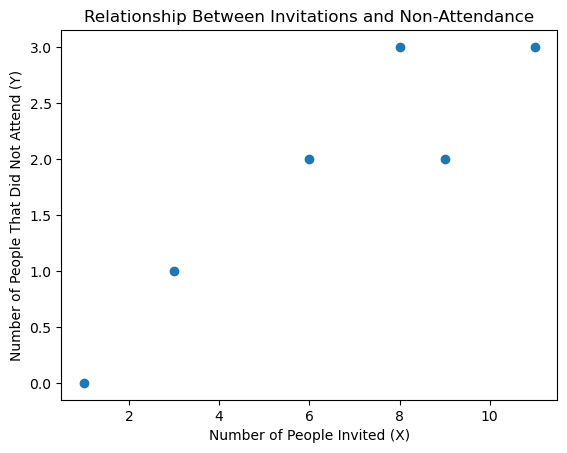

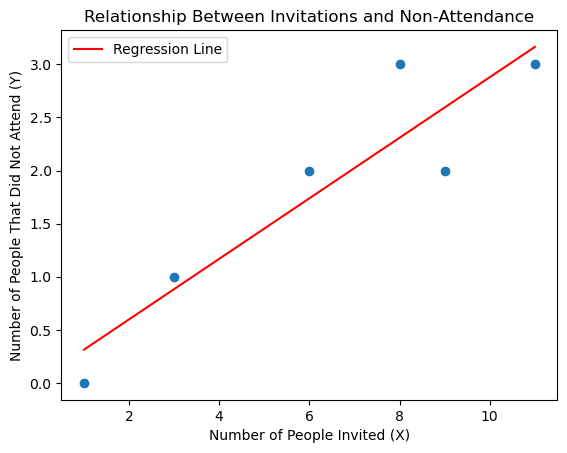

In [144]:
# Builds a dataframe for the data provided.

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data 
X = np.array([1, 3, 6, 8, 9, 11])  # Number of people invited
Y = np.array([0, 1, 2, 3, 2, 3])  # Number of people that did not attend

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(X, Y)

# Print the results
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

# Create a scatter plot
plt.scatter(X, Y)
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People That Did Not Attend (Y)")
plt.title("Relationship Between Invitations and Non-Attendance")
plt.show()

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
line = slope * X + intercept

# Plot the regression line
plt.plot(X, line, color='red', label='Regression Line')
plt.scatter(X, Y)
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People That Did Not Attend (Y)")
plt.title("Relationship Between Invitations and Non-Attendance")
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Removing the (4,0) and (14,1) outlying datapoints resulted in a better fitting regression line. It also resulted in a stronger positive relationship, and a p-value less than 0.05. It now appears that it is a stronger, positive relationship, and that it is
unlikely to have happened by chance.